In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Convolution2D, MaxPooling2D, Flatten, BatchNormalization, Dropout, Activation
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import sklearn.metrics as metrics
from keras.optimizers import Adam
from keras.utils import to_categorical
import tensorflow as tf
from sklearn.metrics import balanced_accuracy_score
import cv2
from imblearn.over_sampling import RandomOverSampler, SMOTE

# DADOS

In [3]:
xt = np.load("Dados/Xtrain_Classification1.npy") 
yt = np.load("Dados/ytrain_Classification1.npy")
# scalerx = MinMaxScaler().fit(xt)
# xScaled = scalerx.transform(xt)
# scalerx = StandardScaler().fit(xt)
# xScaled = scalerx.transform(xt)
xScaled =  (xt).astype('float32')/255.0
# oi = (xt).reshape(-1,28,28,3)
# for i in oi[0:1]:
#     plt.imshow(i)
#     plt.show()
# oi = (xScaled).reshape(-1,28,28,3)
# for i in oi[0:1]:
#     plt.imshow(i)
#     plt.show()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(xScaled, yt, test_size=0.2, shuffle=True, random_state=10)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, shuffle=True, random_state=10)

# sm = SMOTE(random_state = 2) 
# X_train, y_train = sm.fit_resample(X_train, y_train) 


# print(y_train)
  
# print("After OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
# print("After OverSampling, counts of label '0': {}".format(sum(y_train == 0))) 
# y_train = to_categorical(y_train,2)
# X_testrs = X_test.reshape(-1, 28,28,3)
# X_trainrs = X_train.reshape(-1, 28,28,3)
# X_validationrs = X_validation.reshape(-1, 28,28,3)

In [5]:
X_testrs = X_test.reshape(-1, 28,28,3)
X_trainrs = X_train.reshape(-1, 28,28,3)
X_validationrs = X_validation.reshape(-1, 28,28,3)
addx = np.array([])
addy = np.array([]) 
for idx, i in enumerate(y_train):
        for l in range(3):
            if l == 0:
                if not np.any(addx):
                    addx = np.expand_dims(cv2.rotate(X_trainrs[idx], cv2.ROTATE_90_COUNTERCLOCKWISE), axis=0)
                    addy = np.append(addy,i)
                else:
                    aux = np.expand_dims(cv2.rotate(X_trainrs[idx], cv2.ROTATE_90_COUNTERCLOCKWISE), axis=0)
                    addx = np.append(addx,aux,axis=0)
                    addy = np.append(addy,i)
                   
            elif l == 1:
                aux = np.expand_dims(cv2.rotate(X_trainrs[idx], cv2.ROTATE_90_CLOCKWISE), axis=0) 
                addx = np.append(addx,aux,axis=0)
                addy = np.append(addy,i)
            
            elif l == 2:
                aux = np.expand_dims(cv2.rotate(X_trainrs[idx],  cv2.ROTATE_180), axis=0) 
                addx = np.append(addx,aux,axis=0)
                addy = np.append(addy,i)

X_trainrs = np.append(X_trainrs,addx,axis=0) 
y_train = np.append(y_train,addy)

# counter1 = 0
# counter0 = 0
# for i in y_train:
#     if i[1] == 1: 
#         counter1 += 1
#     if i[1] == 0:
#         counter0 +=1

# print(counter1)
# print(counter0)



In [6]:
# counterx=0
# countery=0
# increment = 4
# add = []
# for idx, i in enumerate(y_train):
#         if i == 1:
#             counterx += increment
#             for k in range(0, increment-1):
#                 y_train = np.append(y_train, i)
#                 add = np.append(add, X_train[idx, :])
#         else: 
#              countery += 1
# X_train = np.append(X_train, add)
# print(counterx/(counterx+countery), countery/(counterx+countery), counterx, countery)
X_trainrs = X_trainrs.reshape(-1, 28*28*3)  
oversample = RandomOverSampler(sampling_strategy='minority')
X_trainrs, y_train = oversample.fit_resample(X_trainrs, y_train)
X_trainrs = X_trainrs.reshape(-1, 28,28,3)
y_train = to_categorical(y_train,2)
y_validation = to_categorical(y_validation,2)
y_test = to_categorical(y_test,2)


In [7]:
# X_testrs = X_test.reshape(-1, 28,28,3)
# X_trainrs = X_train.reshape(-1, 28,28,3)
# X_validationrs = X_validation.reshape(-1, 28,28,3)
# from scipy.ndimage import rotate
# angle = [90, 180, 270]
# for idx,i in enumerate(X_trainrs):
#     if y_train[idx] == 1:
#         for ang in angle:
#             X_trainrs = np.vstack((X_trainrs, rotate(i, ang, reshape=False).reshape(-1,28,28,3)))
#             y_train = np.append(y_train,y_train[idx])
# y_train = to_categorical(y_train,2)
# y_validation = to_categorical(y_validation,2)
# counter1 = 0
# counter0 = 0
# for i in y_train:
#     if i[1] == 1: 
#         counter1 += 1
#     if i[1] == 0:
#         counter0 +=1
# print(counter1)
# print(counter0)

# Apenas para ver as imagens

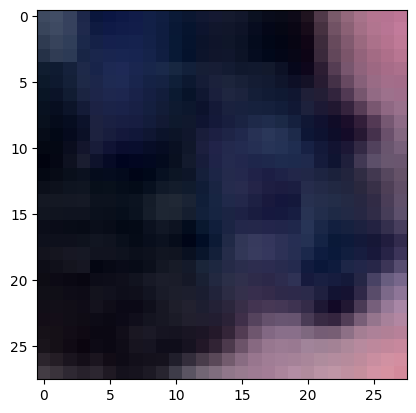

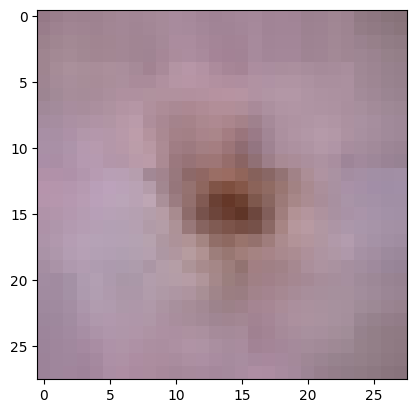

[[0. 1.]
 [0. 1.]]


In [8]:
oi = X_trainrs
for i in oi[-2:]:
    plt.imshow(i)
    plt.show()
print(y_train[-2:])

# Código da Neural Network

In [98]:
# MLP = Sequential()
# MLP.add(Convolution2D(16, kernel_size = 3, activation='relu', input_shape=(28, 28, 3), padding='same'))
# MLP.add(MaxPooling2D((2, 2), strides=2))
# MLP.add(Convolution2D(32, kernel_size = 3, activation='relu', padding='same'))
# MLP.add(MaxPooling2D((2, 2), strides=2))
# MLP.add(Convolution2D(32, kernel_size = 7, activation='relu', padding='same'))
# MLP.add(MaxPooling2D((2, 2), strides=2))
# MLP.add(Flatten())
# MLP.add(Dense(64, activation='relu'))
# MLP.add(Dense(32, activation='relu'))
# MLP.add(Dropout(0.5))
# MLP.add(Dense(64, activation='relu'))
# MLP.add(Dropout(0.8))
# MLP.add(Dense(2, activation='softmax'))


MLP = Sequential()
MLP.add(Convolution2D(16, (3,3), activation='relu', input_shape=(28, 28, 3), padding='same'))
MLP.add(MaxPooling2D((2, 2), strides=2))
MLP.add(Convolution2D(32, (5,5), activation='relu', padding='same'))
MLP.add(MaxPooling2D((2, 2), strides=2))
MLP.add(Convolution2D(32, (7,7), activation='relu', padding='same'))
MLP.add(MaxPooling2D((2, 2), strides=2))
MLP.add(Flatten())
MLP.add(Dense(64, activation='relu'))
MLP.add(Dense(32, activation='relu'))
MLP.add(Dropout(0.7))
MLP.add(Dense(32, activation='relu'))
MLP.add(Dense(2, activation='softmax'))

In [99]:
# MLP = Sequential()
# MLP.add(Dense(64,input_dim=28*28*3, activation='relu'))
# MLP.add(Dense(32, activation='relu'))
# MLP.add(Dense(2, activation='softmax'))
# X_trainrs = X_train.reshape(-1, 28*28*3)
# X_validationrs = X_validation
# X_testrs = X_test

In [100]:
MLP.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 28, 28, 16)        448       
                                                                 
 max_pooling2d_23 (MaxPooli  (None, 14, 14, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_27 (Conv2D)          (None, 14, 14, 32)        12832     
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 7, 7, 32)          0         
 ng2D)                                                           
                                                                 
 conv2d_28 (Conv2D)          (None, 7, 7, 32)          50208     
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 3, 3, 32)         

In [101]:
# learning_rate_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
#     initial_learning_rate=0.0001,
#     decay_steps=10000,
#     decay_rate=0.96
# )
# lr_callback = tf.keras.callbacks.ReduceLROnPlateau(
#     monitor='val_loss',
#     factor=0.8,
#     patience=4,
#     min_lr=0.0001
# )
MLP.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


In [102]:
Early_callback = EarlyStopping(monitor='val_loss', patience=20, mode='min', verbose=1, restore_best_weights=True, min_delta=0.0001)
hist = MLP.fit(x=X_trainrs, y=y_train, epochs=100, validation_data=(X_validationrs, y_validation), verbose=2, batch_size=1000, callbacks=[Early_callback])

Epoch 1/100
28/28 - 10s - loss: 0.6501 - accuracy: 0.6173 - val_loss: 0.5134 - val_accuracy: 0.6194 - 10s/epoch - 367ms/step
Epoch 2/100
28/28 - 9s - loss: 0.5508 - accuracy: 0.7122 - val_loss: 0.4887 - val_accuracy: 0.6154 - 9s/epoch - 308ms/step
Epoch 3/100
28/28 - 9s - loss: 0.5039 - accuracy: 0.7426 - val_loss: 0.5322 - val_accuracy: 0.6214 - 9s/epoch - 316ms/step
Epoch 4/100
28/28 - 9s - loss: 0.4779 - accuracy: 0.7623 - val_loss: 0.5225 - val_accuracy: 0.6563 - 9s/epoch - 332ms/step
Epoch 5/100
28/28 - 9s - loss: 0.4470 - accuracy: 0.7850 - val_loss: 0.4242 - val_accuracy: 0.7423 - 9s/epoch - 319ms/step
Epoch 6/100
28/28 - 9s - loss: 0.4253 - accuracy: 0.8000 - val_loss: 0.4368 - val_accuracy: 0.7383 - 9s/epoch - 312ms/step
Epoch 7/100
28/28 - 9s - loss: 0.4115 - accuracy: 0.8051 - val_loss: 0.4012 - val_accuracy: 0.7632 - 9s/epoch - 314ms/step
Epoch 8/100
28/28 - 9s - loss: 0.4169 - accuracy: 0.8002 - val_loss: 0.4641 - val_accuracy: 0.7193 - 9s/epoch - 323ms/step
Epoch 9/100
28

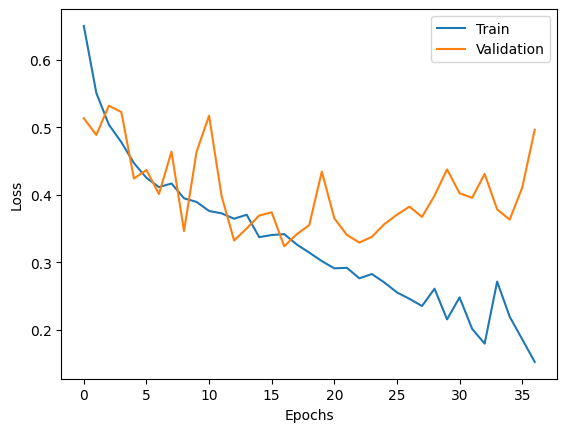

In [103]:
plotx = hist.history['loss']
plotty = hist.history['val_loss']
plt.plot(plotx)
plt.plot(plotty)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()

In [104]:
# y_predtrain = MLP.predict(X_trainrs, verbose=0)
# y_predtrain = np.argmax(y_predtrain, axis=1)
# cm2 = confusion_matrix(np.argmax(y_train, axis=1), y_predtrain)
# disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=[0,1])
# disp2.plot()
# plt.show()
# print("F1 ->", f1_score(np.argmax(y_train, axis=1), y_predtrain))

In [105]:
from sklearn.metrics import f1_score
y_pred = MLP.predict(X_testrs, verbose=0)
y_pred = np.argmax(y_pred, axis=1)
MLP.evaluate(X_testrs, y_test, verbose=1)
y_comp = np.argmax(y_test, axis=1)
print("F1 ->", f1_score(y_comp, y_pred))
print("Balanced ACC ->", balanced_accuracy_score(y_comp, y_pred))
cm = confusion_matrix(y_comp, y_pred)
print(cm)

40/40 [==============================] - 0s 7ms/step - loss: 0.3337 - accuracy: 0.8145
F1 -> 0.5572519083969465
Balanced ACC -> 0.8058300395256917
[[873 194]
 [ 38 146]]


In [117]:
xfinal = np.load("Dados/Xtest_Classification1.npy") 
xfinal1 = xfinal.reshape(-1, 28,28,3)

yfinal = MLP.predict(xfinal1)
#yfinal = to_categorical(yfinal,1)
print(yfinal)
np.save("Dados/ytest_Classification1", yfinal)

56/56 [==============================] - 0s 6ms/step
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [111]:
counter = 0
for i in range(len(y_comp)):
    if(y_pred[i] != y_comp[i]):
        #print(i, "\t", y_pred[i], "\t", y_test[i])
        counter+=1
counter

232

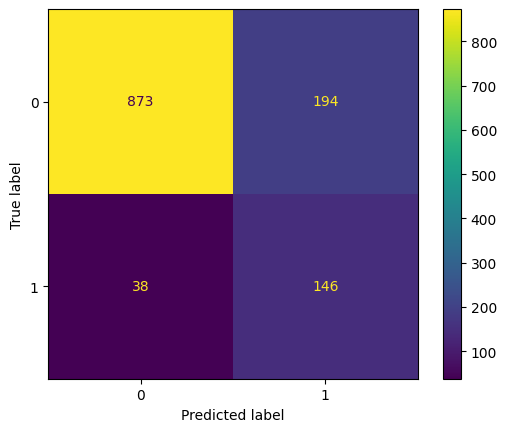

In [112]:
cm = confusion_matrix(y_comp, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()
plt.show()


# Valores finais a prever

In [113]:
# X_testfinal = np.load("Dados/Xtest_Classification1.npy")
# X_testfinal = X_testfinal.astype('float32')/255.0
# X_testfinal = X_testfinal.reshape(-1, 28,28,3)  
# y_final = MLP.predict(X_testfinal, verbose=0)
# y_final = np.argmax(y_final, axis=1)
# np.save("Dados/ytest_Classification1.npy", y_final)


In [114]:
# counter1 = 0
# counter0 = 0
# for i in y_final:
#     if i == 1: 
#         counter1 += 1
#     if i == 0:
#         counter0 +=1
# print(counter0)
# print(counter1)